In [25]:
from fidlib.basicfunctions import create_heisenberg
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import state_fidelity,Statevector
from qiskit.circuit.random import random_circuit
import plotly.express as px
import numpy as np

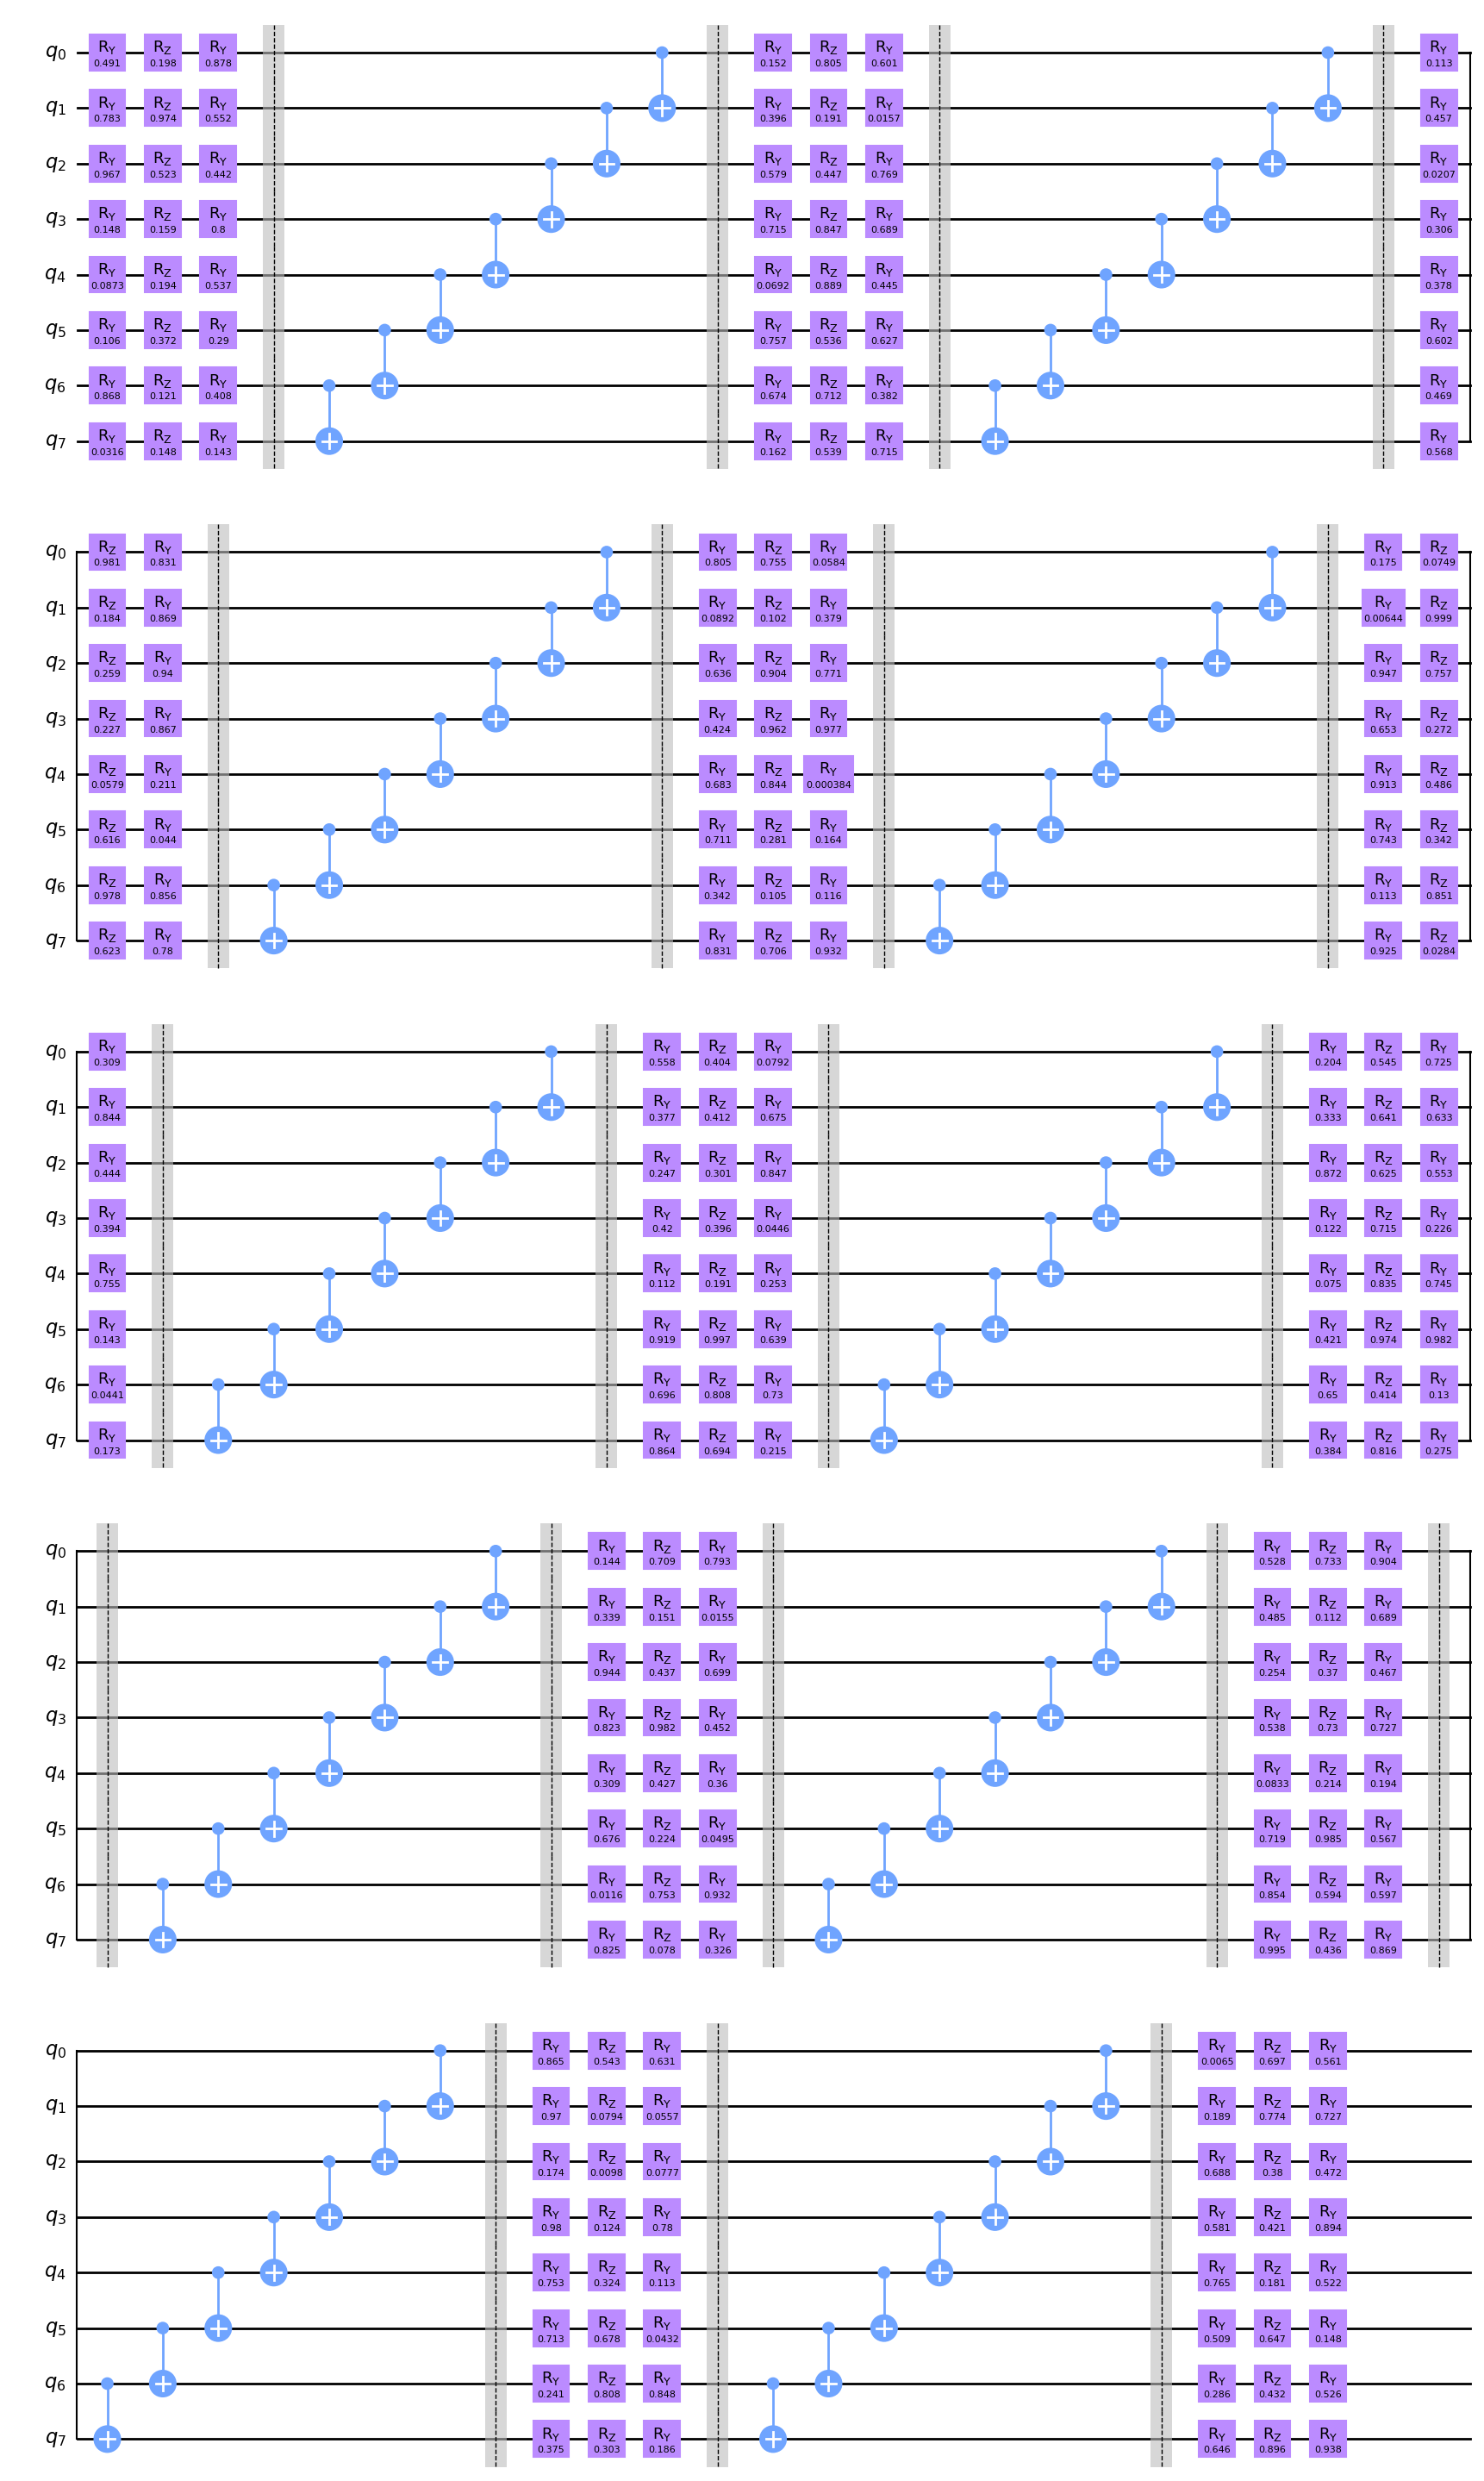

In [26]:
num_qubits=8
qc = EfficientSU2(num_qubits=num_qubits,insert_barriers=True,entanglement="reverse_linear",reps=10,su2_gates=["ry","rz","ry"])
# qc = random_circuit(num_qubits=num_qubits,depth=3)
initial_parameters = np.random.rand(qc.num_parameters)
display(qc.decompose().assign_parameters(initial_parameters).draw(output='mpl'))

In [27]:
initial_state = Statevector(qc.assign_parameters(initial_parameters))
# display(initial_state,output="mpl")

In [28]:
parameter_perturbation = np.random.rand(qc.num_parameters); parameter_perturbation /= np.linalg.norm(parameter_perturbation)
# parameter_perturbation = np.zeros(qc.num_parameters); parameter_perturbation[1]=1
eps = 5
def perturbed_fidelity(pertsize:float)->float:
    pert_state = Statevector(qc.assign_parameters(initial_parameters+pertsize*parameter_perturbation))
    return state_fidelity(pert_state,initial_state)
epsilons =np.linspace(-eps,eps,100)
infidelities = 1-np.vectorize(perturbed_fidelity)(epsilons)
df = {"Epsilon":epsilons,"Infidelity":infidelities}
fig = px.line(data_frame=df,x="Epsilon",y="Infidelity")
fig.show()